In [54]:
import pandas as pd
import requests
from io import StringIO


In [55]:
res = requests.get('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day36-imputing-numerical-data/titanic_toy.csv').text
df= pd.read_csv(StringIO(res))

In [56]:
df.head()    

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:3], df.iloc[:,[-1]], test_size=0.2, random_state=42)

In [58]:
x_train.isnull().sum()

Age       140
Fare       36
Family      0
dtype: int64

In [59]:
x_train['Age_99']=x_train['Age'].fillna(99)
x_train['Age_1']=x_train['Age'].fillna(-1)

x_train['Fare_99']=x_train['Fare'].fillna(99)
x_train['Fare_1']=x_train['Fare'].fillna(-1)

In [60]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after 99 wala imputation: ', x_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', x_train['Age_1'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', x_train['Fare_99'].var())
print('Fare Variance after -1 wala imputation: ', x_train['Fare_1'].var())

Original Age variable variance:  210.2517072477435
Age Variance after 99 wala imputation:  932.9665366701432
Age Variance after -1 wala imputation:  315.9955036260055
Original Fare variable variance:  2761.0314349486343
Fare Variance after 999 wala imputation:  2833.708690936761
Fare Variance after -1 wala imputation:  2675.2394049177024


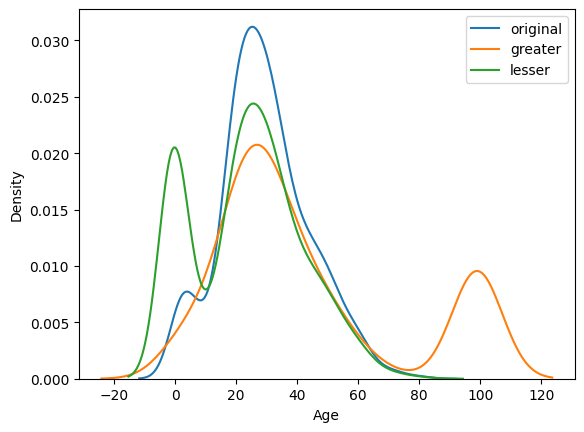

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(x_train['Age'], ax = ax, label = 'original')
sns.kdeplot(x_train['Age_99'], ax = ax, label = 'greater')
sns.kdeplot(x_train['Age_1'], ax = ax, label = 'lesser')

ax.legend(loc='best')
plt.show()

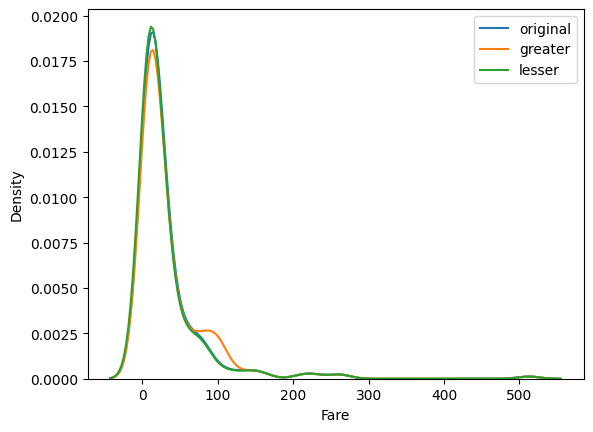

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.kdeplot(x_train['Fare'], ax = ax, label = 'original')
sns.kdeplot(x_train['Fare_99'], ax = ax, label = 'greater')
sns.kdeplot(x_train['Fare_1'], ax = ax, label = 'lesser')

ax.legend(loc='best')
plt.show()

In [63]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_1,Fare_99,Fare_1
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,75.273024,69.137162
Fare,75.481375,2761.031435,18.599163,-111.965046,135.785804,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-6.941982,-5.034556,17.603852,17.684447
Age_99,210.251707,-111.965046,-6.941982,932.966537,-166.460682,-116.528480,-101.137070
Age_1,210.251707,135.785804,-5.034556,-166.460682,315.995504,138.114503,124.270305
Fare_99,75.273024,2761.031435,17.603852,-116.528480,138.114503,2833.708691,2514.109946
Fare_1,69.137162,2761.031435,17.684447,-101.137070,124.270305,2514.109946,2675.239405


In [64]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_1,Fare_99,Fare_1
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.091016,0.085422
Fare,0.091482,1.000000,0.207193,-0.069365,0.145071,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.135079,-0.168329,0.196548,0.203212
Age_99,1.000000,-0.069365,-0.135079,1.000000,-0.306576,-0.071667,-0.064017
Age_1,1.000000,0.145071,-0.168329,-0.306576,1.000000,0.145956,0.135159
Fare_99,0.091016,1.000000,0.196548,-0.071667,0.145956,1.000000,0.913115
Fare_1,0.085422,1.000000,0.203212,-0.064017,0.135159,0.913115,1.000000


In [65]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:3], df.iloc[:,[-1]], test_size=0.2, random_state=42)
impGreat = SimpleImputer(strategy='constant', fill_value=99)
impLess = SimpleImputer(strategy='constant', fill_value=-1)

In [66]:
trf = ColumnTransformer(transformers=[
    ('impGreatAge', impGreat, ['Age']),
    ('impLessFare', impLess, ['Fare'])
])

In [67]:
x_train = trf.fit(x_train)

In [69]:
trf.named_transformers_['impGreatAge'].statistics_

array([99], dtype=object)

In [70]:
trf.named_transformers_['impLessFare'].statistics_

array([-1], dtype=object)

In [71]:
x_train

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('impGreatAge', ...), ('impLessFare', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``featur